In [1]:
from typing import Callable
from os import makedirs
from os.path import join
import numpy as np
import pandas as pd
from verma_net_radiation import verma_net_radiation_table
from PTJPLSM import process_PTJPLSM_table
from monte_carlo_sensitivity import perturbed_run, sensitivity_analysis, divide_absolute_by_unperturbed
import matplotlib.pyplot as plt
from scipy.stats import mstats
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [2]:
input_filename = "ECOv002-cal-val-PT-JPL-SM-inputs.csv"

In [3]:
normalization_function = divide_absolute_by_unperturbed

In [4]:
input_df = pd.read_csv(input_filename)
input_df = input_df[input_df.fAPARmax != 0]
input_df

,ID,name,Topt,fAPARmax,canopy_height_meters,field_capacity,wilting_point,geometry,ST_K,ST_C,NDVI,Ta_C,RH,Rg,Rn,albedo,SM,EmisWB
0,US-NC3,NC_Clearcut#3,10.09,0.4659,20.642902,0.24,0.11,POINT (-76.656 35.799),305.10,31.95,0.709729,32.658920,0.560215,545.51056,393.85710,0.215445,0.192359,0.948
1,US-Mi3,LTAR UCB (Upper Chesapeake Bay) Miscanthus 3,1.39,0.4865,0.000000,0.31,0.14,POINT (-80.637 41.8222),304.34,31.19,0.605842,24.227982,0.458503,848.34390,643.47500,0.117238,0.293216,0.952
2,US-Mi3,LTAR UCB (Upper Chesapeake Bay) Miscanthus 3,1.39,0.4865,0.000000,0.31,0.14,POINT (-80.637 41.8222),304.06,30.91,0.578494,26.178862,0.621679,838.81160,628.76870,0.117280,0.433436,0.972
3,US-Mi3,LTAR UCB (Upper Chesapeake Bay) Miscanthus 3,1.39,0.4865,0.000000,0.31,0.14,POINT (-80.637 41.8222),301.80,28.65,0.658499,22.527096,0.623986,851.72480,626.95960,0.084629,0.391243,0.974
4,US-Mi3,LTAR UCB (Upper Chesapeake Bay) Miscanthus 3,1.39,0.4865,0.000000,0.31,0.14,POINT (-80.637 41.8222),303.18,30.03,0.666747,23.280691,0.571613,702.55160,513.13380,0.120526,0.333870,0.960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,US-xAE,NEON Klemme Range Research Station (OAES),7.99,0.3387,0.000000,0.28,0.13,POINT (-99.0588 35.4106),278.78,5.63,0.268441,3.815752,0.395740,286.84660,163.24739,0.092853,0.085971,0.980
1061,US-xAE,NEON Klemme Range Research Station (OAES),7.99,0.3387,0.000000,0.28,0.13,POINT (-99.0588 35.4106),293.28,20.13,0.225175,19.266186,0.397430,290.87400,166.19196,0.111844,0.086697,0.976
1062,US-xAE,NEON Klemme Range Research Station (OAES),7.99,0.3387,0.000000,0.28,0.13,POINT (-99.0588 35.4106),301.94,28.79,0.282996,32.110336,0.341227,352.19530,235.88159,0.106782,0.058330,0.976
1063,US-xAE,NEON Klemme Range Research Station (OAES),7.99,0.3387,0.000000,0.28,0.13,POINT (-99.0588 35.4106),290.72,17.57,0.284051,10.464681,0.349086,420.67880,247.87890,0.106775,0.067998,0.976


In [5]:
np.nanmin(input_df.fAPARmax)

np.float64(0.2331)

In [6]:
def process_verma_PTJPLSM_table(input_df: pd.DataFrame) -> pd.DataFrame:
    return process_PTJPLSM_table(verma_net_radiation_table(input_df))

In [7]:
processed = process_verma_PTJPLSM_table(input_df)
processed

[2025-07-22 15:26:48 INFO] variable fAPARmax min: 0.233 mean: 0.382 max: 0.624 nan: 0.00% (nan)
[2025-07-22 15:26:48 INFO] variable Ta_C min: -14.605 mean: 22.322 max: 39.710 nan: 0.00% (nan)
[2025-07-22 15:26:48 INFO] variable RH min: 0.273 mean: 0.427 max: 0.984 nan: 0.00% (nan)
[2025-07-22 15:26:48 INFO] variable soil_moisture min: 0.000 mean: 0.168 max: 0.897 nan: 0.00% (nan)
[2025-07-22 15:26:48 INFO] variable field_capacity min: 0.190 mean: 0.283 max: 0.390 nan: 0.00% (nan)
[2025-07-22 15:26:48 INFO] variable wilting_point min: 0.040 mean: 0.121 max: 0.290 nan: 0.00% (nan)
[2025-07-22 15:26:48 INFO] variable canopy_height_meters min: 0.000 mean: 6.044 max: 30.192 nan: 0.00% (nan)
[2025-07-22 15:26:48 INFO] variable Rn_Wm2 min: 0.000 mean: 422.206 max: 843.390 nan: 0.00% (nan)
[2025-07-22 15:26:48 INFO] variable G min: 0.000 mean: 52.277 max: 165.530 nan: 0.19% (nan)
[2025-07-22 15:26:48 INFO] variable fwet min: 0.006 mean: 0.054 max: 0.936 nan: 0.00% (nan)
[2025-07-22 15:26:48 IN

,ID,name,Topt,fAPARmax,canopy_height_meters,field_capacity,wilting_point,geometry,ST_K,ST_C,...,LWin,LWout,G,Rn_soil,LE_soil,Rn_canopy,PET,LE_canopy,LE_interception,LE
0,US-NC3,NC_Clearcut#3,10.09,0.4659,20.642902,0.24,0.11,POINT (-76.656 35.799),305.10,31.95,...,433.191382,465.788054,51.199585,108.445418,58.201499,286.941176,349.932890,226.051337,28.734377,312.987213
1,US-Mi3,LTAR UCB (Upper Chesapeake Bay) Miscanthus 3,1.39,0.4865,0.000000,0.31,0.14,POINT (-80.637 41.8222),304.34,31.19,...,355.960473,463.110120,81.090155,242.327021,148.708752,399.409026,517.083672,222.315383,16.280228,387.304363
2,US-Mi3,LTAR UCB (Upper Chesapeake Bay) Miscanthus 3,1.39,0.4865,0.000000,0.31,0.14,POINT (-80.637 41.8222),304.06,30.91,...,385.005187,471.101631,84.048662,265.452689,171.730758,388.886290,539.879902,96.551223,54.990758,323.272739
3,US-Mi3,LTAR UCB (Upper Chesapeake Bay) Miscanthus 3,1.39,0.4865,0.000000,0.31,0.14,POINT (-80.637 41.8222),301.80,28.65,...,357.100788,458.191551,70.192914,220.223334,134.990070,458.330042,547.373133,108.049874,62.517459,305.557402
4,US-Mi3,LTAR UCB (Upper Chesapeake Bay) Miscanthus 3,1.39,0.4865,0.000000,0.31,0.14,POINT (-80.637 41.8222),303.18,30.03,...,358.727378,459.922447,58.699784,163.457363,95.318040,353.223153,416.712815,118.816027,34.312196,248.446262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,US-xAE,NEON Klemme Range Research Station (OAES),7.99,0.3387,0.000000,0.28,0.13,POINT (-99.0588 35.4106),278.78,5.63,...,237.686968,335.647726,4.078005,120.709633,1.660663,41.541526,91.824890,13.658024,0.591490,15.910178
1061,US-xAE,NEON Klemme Range Research Station (OAES),7.99,0.3387,0.000000,0.28,0.13,POINT (-99.0588 35.4106),293.28,20.13,...,317.465236,409.440488,15.458719,132.038087,2.481284,34.328190,128.742933,19.782974,0.730644,22.994901
1062,US-xAE,NEON Klemme Range Research Station (OAES),7.99,0.3387,0.000000,0.28,0.13,POINT (-99.0588 35.4106),301.94,28.79,...,401.910116,459.984925,33.685416,186.580017,2.096448,69.932313,225.364587,58.572452,0.958892,61.627793
1063,US-xAE,NEON Klemme Range Research Station (OAES),7.99,0.3387,0.000000,0.28,0.13,POINT (-99.0588 35.4106),290.72,17.57,...,266.094367,395.330786,19.755022,179.019182,1.670621,67.505054,160.182155,39.163295,0.708102,41.542018


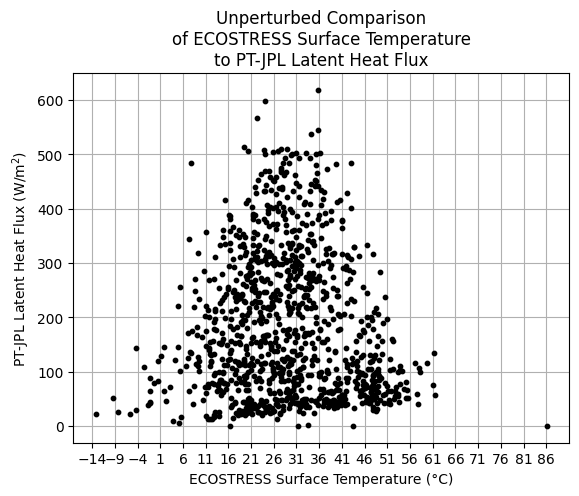

In [8]:
plt.xticks(range(int(min(processed.ST_C)), int(max(processed.ST_C)) + 1, 5))
plt.scatter(x=processed.ST_C, y=processed.LE, color='black', s=10, zorder=5)
plt.grid(True, zorder=0)
plt.xlabel("ECOSTRESS Surface Temperature (°C)")
plt.ylabel("PT-JPL Latent Heat Flux (W/m$^2$)")
plt.title("Unperturbed Comparison\nof ECOSTRESS Surface Temperature\nto PT-JPL Latent Heat Flux")

plt.savefig("Unperturbed Comparison of ECOSTRESS Surface Temperature to PT-JPL Latent Heat Flux.jpeg", format='jpeg', bbox_inches='tight')
plt.savefig("Unperturbed Comparison of ECOSTRESS Surface Temperature to PT-JPL Latent Heat Flux.svg", format='svg', bbox_inches='tight')

plt.show()

In [9]:
input_df = pd.read_csv(input_filename)

if "Ta" in input_df and "Ta_C" not in input_df:
    # input_df.rename({"Ta": "Ta_C"}, inplace=True)
    input_df["Ta_C"] = input_df["Ta"]

input_df = input_df[input_df.fAPARmax.apply(lambda fAPARmax: fAPARmax > 0.001)]
input_df = input_df[input_df.NDVI.apply(lambda NDVI: NDVI > 0.05)]

np.nanmin(input_df.ST_C), np.nanmax(input_df.ST_C)

(np.float64(-13.189999999999998), np.float64(86.11000000000001))

In [10]:
len(input_df)

1063

In [11]:
input_variable = "ST_C"
output_variable = "LE"

results = perturbed_run(
    input_df=input_df, 
    input_variable=input_variable, 
    output_variable=output_variable, 
    forward_process=process_verma_PTJPLSM_table,
    normalization_function=normalization_function
)

results

[2025-07-22 15:26:49 INFO] variable fAPARmax min: 0.233 mean: 0.382 max: 0.624 nan: 0.00% (nan)
[2025-07-22 15:26:49 INFO] variable Ta_C min: -14.605 mean: 22.380 max: 39.710 nan: 0.00% (nan)
[2025-07-22 15:26:49 INFO] variable RH min: 0.273 mean: 0.427 max: 0.984 nan: 0.00% (nan)
[2025-07-22 15:26:49 INFO] variable soil_moisture min: 0.000 mean: 0.168 max: 0.897 nan: 0.00% (nan)
[2025-07-22 15:26:49 INFO] variable field_capacity min: 0.190 mean: 0.283 max: 0.390 nan: 0.00% (nan)
[2025-07-22 15:26:49 INFO] variable wilting_point min: 0.040 mean: 0.121 max: 0.290 nan: 0.00% (nan)
[2025-07-22 15:26:49 INFO] variable canopy_height_meters min: 0.000 mean: 6.055 max: 30.192 nan: 0.00% (nan)
[2025-07-22 15:26:49 INFO] variable Rn_Wm2 min: 0.000 mean: 422.824 max: 843.390 nan: 0.00% (nan)
[2025-07-22 15:26:49 INFO] variable G min: 0.000 mean: 52.277 max: 165.530 nan: 0.00% (nan)
[2025-07-22 15:26:49 INFO] variable fwet min: 0.006 mean: 0.054 max: 0.936 nan: 0.00% (nan)
[2025-07-22 15:26:49 IN

,input_variable,output_variable,input_unperturbed,input_perturbation,input_perturbation_std,input_perturbed,output_unperturbed,output_perturbation,output_perturbation_std,output_perturbed
0,ST_C,LE,31.95,17.167548,0.537325,49.117548,312.987213,-110.16192,0.351969,202.825293
1,ST_C,LE,31.95,-2.254285,0.070557,29.695715,312.987213,14.576161,0.046571,327.563374
2,ST_C,LE,31.95,-0.497737,0.015579,31.452263,312.987213,3.217306,0.010279,316.204519
3,ST_C,LE,31.95,4.875036,0.152583,36.825036,312.987213,-31.466629,0.100536,281.520584
4,ST_C,LE,31.95,9.298319,0.291027,41.248319,312.987213,-59.916558,0.191435,253.070655
...,...,...,...,...,...,...,...,...,...,...
106295,ST_C,LE,41.61,-5.659603,0.136015,35.950397,122.052084,8.897542,0.0729,130.949626
106296,ST_C,LE,41.61,1.359923,0.032683,42.969923,122.052084,-2.201684,0.018039,119.850400
106297,ST_C,LE,41.61,-7.059646,0.169662,34.550354,122.052084,11.033613,0.090401,133.085697
106298,ST_C,LE,41.61,18.617786,0.447435,60.227786,122.052084,-32.384476,0.265333,89.667608


In [12]:
filtered_results = results.dropna()
filtered_results

,input_variable,output_variable,input_unperturbed,input_perturbation,input_perturbation_std,input_perturbed,output_unperturbed,output_perturbation,output_perturbation_std,output_perturbed
0,ST_C,LE,31.95,17.167548,0.537325,49.117548,312.987213,-110.16192,0.351969,202.825293
1,ST_C,LE,31.95,-2.254285,0.070557,29.695715,312.987213,14.576161,0.046571,327.563374
2,ST_C,LE,31.95,-0.497737,0.015579,31.452263,312.987213,3.217306,0.010279,316.204519
3,ST_C,LE,31.95,4.875036,0.152583,36.825036,312.987213,-31.466629,0.100536,281.520584
4,ST_C,LE,31.95,9.298319,0.291027,41.248319,312.987213,-59.916558,0.191435,253.070655
...,...,...,...,...,...,...,...,...,...,...
106295,ST_C,LE,41.61,-5.659603,0.136015,35.950397,122.052084,8.897542,0.0729,130.949626
106296,ST_C,LE,41.61,1.359923,0.032683,42.969923,122.052084,-2.201684,0.018039,119.850400
106297,ST_C,LE,41.61,-7.059646,0.169662,34.550354,122.052084,11.033613,0.090401,133.085697
106298,ST_C,LE,41.61,18.617786,0.447435,60.227786,122.052084,-32.384476,0.265333,89.667608


In [13]:
# plt.scatter(filtered_results.input_perturbation, filtered_results.output_perturbation)

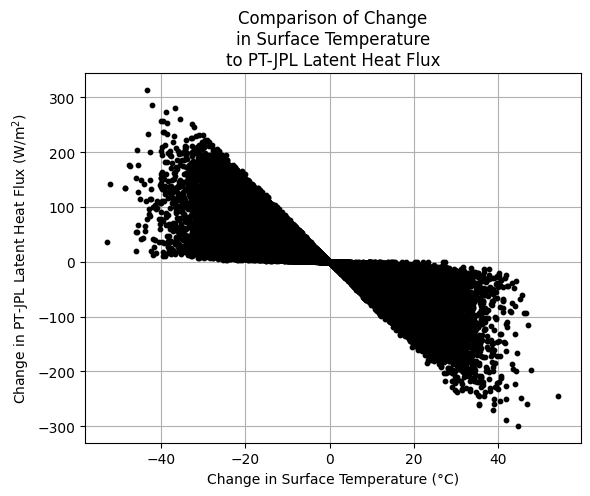

In [14]:
# plt.xticks(range(int(min(processed.ST_C)), int(max(processed.ST_C)) + 1, 5))
# plt.ylim(-350, 150)
plt.scatter(x=results.input_perturbation, y=results.output_perturbation, color='black', s=10, zorder=5)  # Adjust the 's' parameter to make dots thinner
plt.grid(True, zorder=0)
plt.xlabel("Change in Surface Temperature (°C)")
plt.ylabel("Change in PT-JPL Latent Heat Flux (W/m$^2$)")
plt.title("Comparison of Change\nin Surface Temperature\nto PT-JPL Latent Heat Flux")

plt.savefig("Comparison of Change in Surface Temperature to PT-JPL Latent Heat Flux.jpeg", format='jpeg', bbox_inches='tight')
plt.savefig("Comparison of Change in Surface Temperature to PT-JPL Latent Heat Flux.svg", format='svg', bbox_inches='tight')

plt.show()

In [15]:
correlation = mstats.pearsonr(
    np.array(filtered_results.input_perturbation_std).astype(np.float64), 
    np.array(filtered_results.output_perturbation_std).astype(np.float64)
)[0]

correlation

np.float64(0.022605555254169376)

In [16]:
input_variables = ["ST_C", "NDVI", "albedo", "Ta_C", "RH"]
output_variables = ["LE"]

perturbation_df, sensitivity_metrics_df = sensitivity_analysis(
    input_df=input_df,
    input_variables=input_variables,
    output_variables=output_variables,
    forward_process=process_verma_PTJPLSM_table,
    normalization_function=normalization_function
)

sensitivity_metrics_df

[2025-07-22 15:26:50 INFO] variable fAPARmax min: 0.233 mean: 0.382 max: 0.624 nan: 0.00% (nan)
[2025-07-22 15:26:50 INFO] variable Ta_C min: -14.605 mean: 22.380 max: 39.710 nan: 0.00% (nan)
[2025-07-22 15:26:50 INFO] variable RH min: 0.273 mean: 0.427 max: 0.984 nan: 0.00% (nan)
[2025-07-22 15:26:50 INFO] variable soil_moisture min: 0.000 mean: 0.168 max: 0.897 nan: 0.00% (nan)
[2025-07-22 15:26:50 INFO] variable field_capacity min: 0.190 mean: 0.283 max: 0.390 nan: 0.00% (nan)
[2025-07-22 15:26:50 INFO] variable wilting_point min: 0.040 mean: 0.121 max: 0.290 nan: 0.00% (nan)
[2025-07-22 15:26:50 INFO] variable canopy_height_meters min: 0.000 mean: 6.055 max: 30.192 nan: 0.00% (nan)
[2025-07-22 15:26:50 INFO] variable Rn_Wm2 min: 0.000 mean: 422.824 max: 843.390 nan: 0.00% (nan)
[2025-07-22 15:26:50 INFO] variable G min: 0.000 mean: 52.277 max: 165.530 nan: 0.00% (nan)
[2025-07-22 15:26:50 INFO] variable fwet min: 0.006 mean: 0.054 max: 0.936 nan: 0.00% (nan)
[2025-07-22 15:26:50 IN

/opt/homebrew/Caskroom/miniforge/base/envs/PTJPLSM/lib/python3.10/site-packages/monte_carlo_sensitivity/sensitivity_analysis.py:77: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perturbation_df = pd.concat([perturbation_df, run_results])
/opt/homebrew/Caskroom/miniforge/base/envs/PTJPLSM/lib/python3.10/site-packages/monte_carlo_sensitivity/sensitivity_analysis.py:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  sensitivity_metrics_df = pd.concat([sensitivity_metrics_df, pd.DataFrame([[


[2025-07-22 15:26:51 INFO] variable LE_interception min: 0.000 mean: 11.859 max: 117.420 nan: 13.37% (nan)
[2025-07-22 15:26:51 INFO] variable LE min: 0.000 mean: 212.032 max: 813.460 nan: 13.37% (nan)
[2025-07-22 15:26:51 INFO] variable fAPARmax min: 0.233 mean: 0.382 max: 0.624 nan: 0.00% (nan)
[2025-07-22 15:26:51 INFO] variable Ta_C min: -14.605 mean: 22.380 max: 39.710 nan: 0.00% (nan)
[2025-07-22 15:26:51 INFO] variable RH min: 0.273 mean: 0.427 max: 0.984 nan: 0.00% (nan)
[2025-07-22 15:26:51 INFO] variable soil_moisture min: 0.000 mean: 0.168 max: 0.897 nan: 0.00% (nan)
[2025-07-22 15:26:51 INFO] variable field_capacity min: 0.190 mean: 0.283 max: 0.390 nan: 0.00% (nan)
[2025-07-22 15:26:51 INFO] variable wilting_point min: 0.040 mean: 0.121 max: 0.290 nan: 0.00% (nan)
[2025-07-22 15:26:51 INFO] variable canopy_height_meters min: 0.000 mean: 6.055 max: 30.192 nan: 0.00% (nan)
[2025-07-22 15:26:51 INFO] variable Rn_Wm2 min: 0.000 mean: 422.824 max: 843.390 nan: 0.00% (nan)
[2025

,input_variable,output_variable,metric,value
0,ST_C,LE,correlation,0.023073
0,ST_C,LE,r2,0.000532
0,ST_C,LE,mean_normalized_change,0.204473
0,NDVI,LE,correlation,0.802229
0,NDVI,LE,r2,0.643572
0,NDVI,LE,mean_normalized_change,0.375282
0,albedo,LE,correlation,0.308173
0,albedo,LE,r2,0.094970
0,albedo,LE,mean_normalized_change,0.068149
0,Ta_C,LE,correlation,0.021660


/var/folders/bv/410kt7f93x78j9dww00h1pz80000gn/T/ipykernel_95966/1678908124.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Surface\nTemperature", "NDVI", "Albedo", "Air\nTemperature", "Relative\nHumidity"])


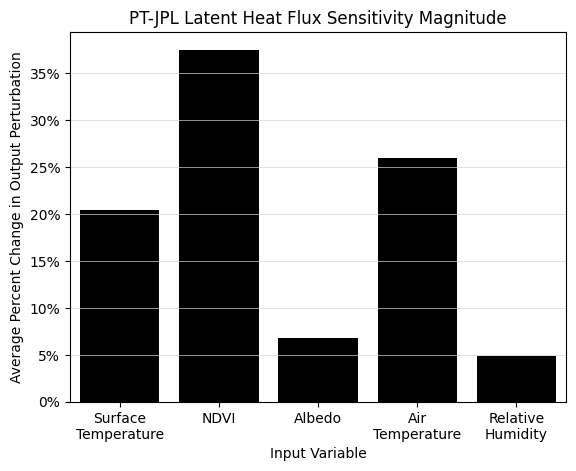

In [17]:
df = sensitivity_metrics_df
df = df[(df.output_variable == "LE") & (df.metric == "mean_normalized_change")]
ax = sns.barplot(x=df.input_variable, y=df.value * 100, color='black')
ax.set_xticklabels(["Surface\nTemperature", "NDVI", "Albedo", "Air\nTemperature", "Relative\nHumidity"])
plt.xlabel("Input Variable")
plt.ylabel("Average Percent Change in Output Perturbation")
plt.title("PT-JPL Latent Heat Flux Sensitivity Magnitude")
# plt.ylim(0, 160)  # Set y-axis range from 0 to 160
plt.grid(axis='y', color='lightgray', linestyle='-', linewidth=0.5)  # Add light gray horizontal gridlines only

# Add percent sign to y-axis tick labels
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{int(y)}%'))

plt.savefig("PT-JPL Latent Heat Flux Sensitivity Magnitude.jpeg", format='jpeg', bbox_inches='tight')
plt.savefig("PT-JPL Latent Heat Flux Sensitivity Magnitude.svg", format='svg', bbox_inches='tight')

plt.show()

/var/folders/bv/410kt7f93x78j9dww00h1pz80000gn/T/ipykernel_95966/2265298213.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Surface\nTemperature", "NDVI", "Albedo", "Air\nTemperature", "Relative\nHumidity"])


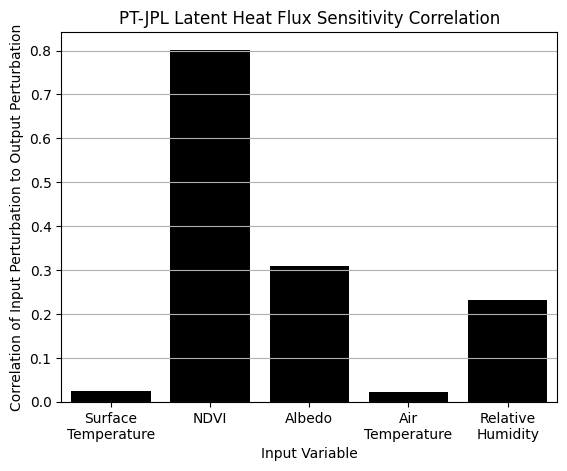

In [18]:
df = sensitivity_metrics_df
df = df[(df.output_variable == "LE") & (df.metric == "correlation")]
ax = sns.barplot(x=df.input_variable, y=df.value, color='black')
ax.set_xticklabels(["Surface\nTemperature", "NDVI", "Albedo", "Air\nTemperature", "Relative\nHumidity"])
# plt.ylim(0, 0.8)
plt.xlabel("Input Variable")
plt.ylabel("Correlation of Input Perturbation to Output Perturbation")
plt.title("PT-JPL Latent Heat Flux Sensitivity Correlation")
plt.grid(axis='y')  # Add horizontal gridlines

plt.savefig("PT-JPL Latent Heat Flux Sensitivity Correlation.jpeg", format='jpeg', bbox_inches='tight')
plt.savefig("PT-JPL Latent Heat Flux Sensitivity Correlation.svg", format='svg', bbox_inches='tight')

plt.show()